# Tutorial 3 - Advanced Plots

This third tutorial will go over basic and advanced plotting, from how to produce nice looking plots to creating 3D plots.

## 3.1 Simple Plots

Let's start with a basic plot.  Consider viscous fluid flowing between two boundaries at $y = 0$ and $y = h$, with an imposed constant pressure gradient 
$$
\frac{dp}{dx} = -P.
$$
This is called *Poiseuille flow*, and the fluid velocity is given by
$$
u(y) = \frac{P}{2\nu \rho} ( hy - y^2 ).
$$

Let's plot this, but first let's rewrite the equation:
$$
u(y) = \frac{P h^2}{2\nu \rho} \left( \frac{y}{h} - \frac{y^2}{h^2} \right).
$$
Now we can see that we should actually plot $u / (P h^2/ 2\nu\rho)$ versus $y/h$ -- that way the actual values of those constants won't change the plot.

To start the plot, we'll import the usual libraries (MatPlotLib will do the plotting), but I'll also set some font choices, including making the size large enough for print.

In [21]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

rc('text.latex',preamble='\\usepackage{libertine}\n\\usepackage[libertine]{newtxmath}')
rc('font',**{'family':'serif','serif':['Linux Libertine O']}, size=18)
rc('text', usetex=True)

Here's the simple plot, using NumPy to generate data for the velocity and MatPlotLib to plot it.  I prefer to use an object-oriented interface and work with the axes object directly.

Text(0, 0.5, '$y/h$')

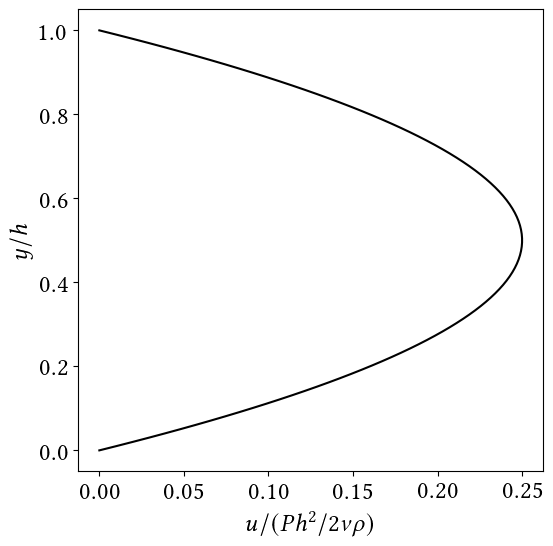

In [23]:
# create the figure and axes objects
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1, 1, 1)

# create the data for the position and fluid velocity
y = np.linspace(0, 1, 100)
u = y - y**2

# It's customary to plot the velocity on the horizontal axis so we can imagine the fluid
# "flowing" to the right
ax.plot(u, y, color="black")

# set axis labels
ax.set_xlabel(r"$u / (Ph^2/2 \nu \rho)$")
ax.set_ylabel(r"$y/h$")

That's pretty much it -- there's not much else we need to do for this one.

## 3.1 Adding Objects to a Plot

But ... maybe we can fancy it up a bit with some velocity vector arrows. And add the boundaries at $y=0$ and $y=h$.  Add maybe add some expanatory text. I'll repeat the code again and add to it:

(-0.2875, 0.5375, -0.27, 1.27)

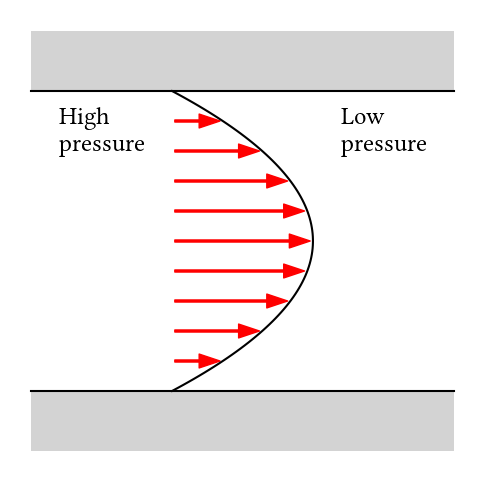

In [45]:
# create the figure and axes objects
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1, 1, 1)

# create the data for the position and fluid velocity
y = np.linspace(0, 1, 100)
u = y - y**2

# It's customary to plot the velocity on the horizontal axis so we can imagine the fluid
# "flowing" to the right
ax.plot(u, y, color="black")

# set axis labels
ax.set_xlabel(r"$u / (Ph^2/2 \nu \rho)$")
ax.set_ylabel(r"$y/h$")

# MatPlotLib will create an arrow for us, but it's a little complicated, so I'll build a function for it.
# Given a y position, it will draw an arrow from u = 0 to u = u(y).
def arrow(y):
    uf = y - y**2
    return matplotlib.patches.FancyArrowPatch((0, y), (uf, y), arrowstyle="Simple, tail_width=0.3, head_width=2, head_length=3", mutation_scale=5, color = "red")

# Okay, draw the arrows
N_arrows = 10
for i in range(N_arrows):
    yi = i/N_arrows
    ax.add_patch(arrow(yi))
    
# Let's add the boundaries as light grey rectangles
rect_top = matplotlib.patches.Rectangle((-0.25, 1.0), 0.75, 0.2, facecolor='lightgrey', zorder=0)
ax.add_patch(rect_top)
# and a border along the wall
ax.plot([-0.25, 0.5], [1, 1], color="black")
rect_bot = matplotlib.patches.Rectangle((-0.25, -0.2), 0.75, 0.2, facecolor='lightgrey', zorder=0)
ax.add_patch(rect_bot)
# and a border along the wall
ax.plot([-0.25, 0.5], [0, 0], color="black")

# Add some text indicated high and low pressure areas
ax.text(-0.2, 0.8, "High\npressure")
ax.text(0.3, 0.8, "Low\npressure")

# I'm not sure we need our axes, either, so remove them
ax.axis('off')

## 3.3 Complicated Functions 1 - Summations

Often in fluid dynamics the velocity is given by an infinite summation -- since we're solving PDEs, we get a linear combination of solutions.  For example, if we turn the pressure gradient of the Poiseuille flow above off and let the fluid slow down, the now time-dependent flow is given by
$$
u(y, t) = \frac{4Ph^2}{\pi^3 \nu \rho} \sum_{n=1, 3, 5 \dots}^\infty \frac{1}{n^3} \sin(n \pi y / h) \, e^{-n^2 \pi^2 \nu t / h^2}.
$$

Let's plot this at a couple of times, but be careful with the units.  We'll plot
* the velocity as $u / (Ph^2/2\nu \rho)$ again
* the position as $y/h$ again
* the time in terms of the characteristic time, $\tau = h^2 / \pi^2 \nu$.

Text(0, 0.5, '$y/h$')

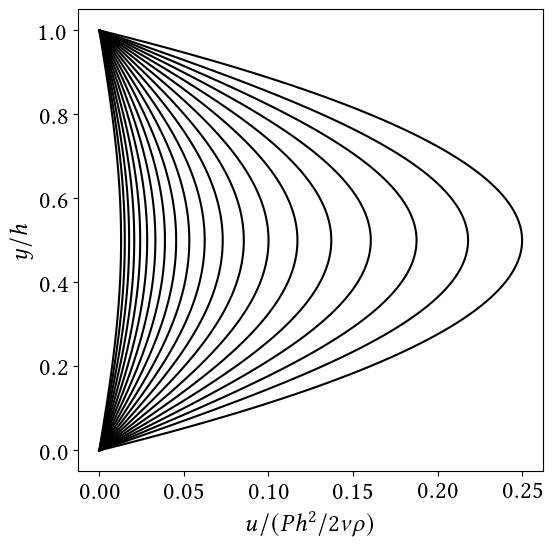

In [66]:
# create the figure and axes objects
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1, 1, 1)

# create the data for the position and fluid velocity
y = np.linspace(0, 1, 100)

# I'll build a function to calculate the velocity at a specific position y and time t.
# Notice how the loop works - I'm using 99 as the upper limit (a little smaller than infinity)
# and spacing the values of n by 2 to get every odd value.
def velocity(y, t = 0):
    u = 0
    for n in range(1, 99, 2):
        u += 1/n**3 * np.sin(n * np.pi * y) * np.exp(-n**2 * t)
    return 8 / np.pi**3 * u

# Let's plot 20 different times just for fun:
ts = np.linspace(0, 3, 20)
for t in ts:
    u = velocity(y, t)
    
    ax.plot(u, y, color="black")

ax.set_xlabel(r"$u / (Ph^2/2 \nu \rho)$")
ax.set_ylabel(r"$y/h$")


## 3.4 Complicated Function 2 - Special Functions

Often we need to plot special function that turn up as solutions to differential equations.  Sine and cosine are the obvious ones, but as a more complicated example, consider the Bessel functions $J_\alpha(x)$ and $Y_\alpha(x)$.  These functions, like sine and cosine, can't be written down explicitly but are defined by a summation.  Luckily, the Python library SciPy has code for them.

Let's make two plots, one for $J$ and one for $Y$, with a bunch of different orders plotted together.

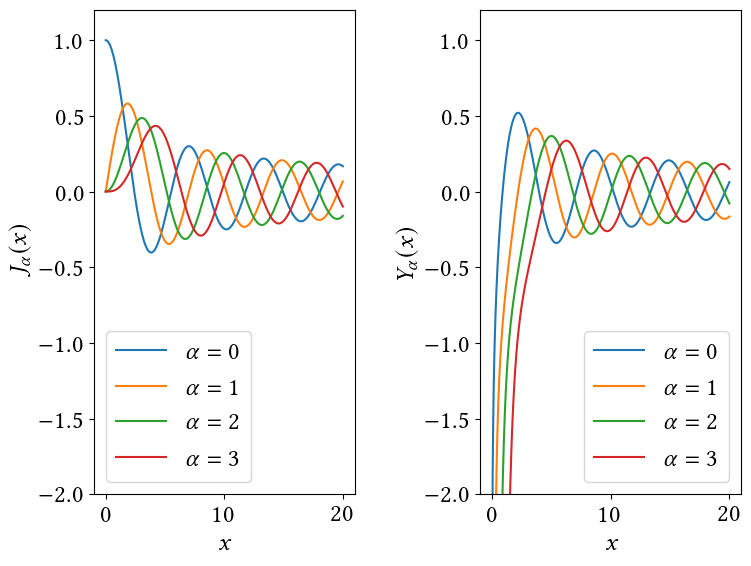

In [98]:
from scipy.special import jv, yv

fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_ylim(-2, 1.2)
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$J_\alpha(x)$")
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_ylim(-2, 1.2)
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$Y_\alpha(x)$")
fig.tight_layout()

# generate data for the two first order Bessel functions
x = np.linspace(0, 20, 1000)
for alpha in range(4):
    J = jv(alpha, x)
    ax1.plot(x, J, label=r"$\alpha =$ " + f"{alpha}")
    Y = yv(alpha, x)
    ax2.plot(x, Y, label=r"$\alpha =$ " + f"{alpha}")
ax1.legend()
ax2.legend()

In fluid dynamics, the Bessel functions come up in circular flow.  For example, in the spin down of a rotating fluid, the velocity is given by
$$
u_\phi(s, t) = 2\Omega a \sum_{n=1}^\infty \frac{J_1(\lambda_n s/a)}{\lambda_n J_2(\lambda_n)} \, e^{-\lambda_n^2 \nu t / a^2},
$$
where $\lambda_n$ is the $n$th zero of the Bessel function $J$.  We can use SciPy to look those up.  Let's put all our ideas together to plot this:

Text(0.5, 0, '$s/a$')

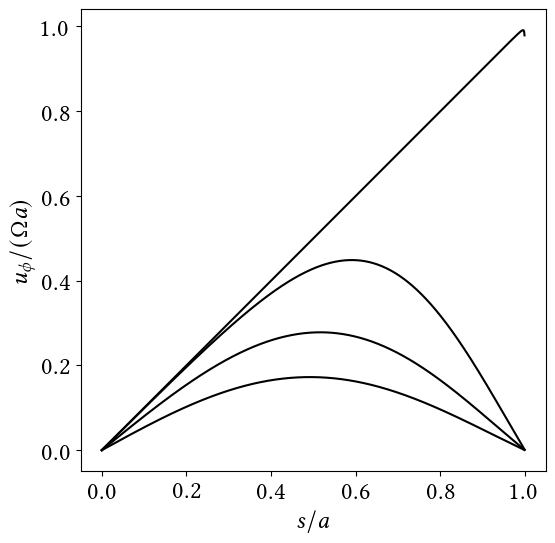

In [129]:
from scipy.special import j1, jv, jn_zeros

# create the figure and axes objects
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1, 1, 1)

# create the data for the position and fluid velocity
s = np.linspace(0, 0.999, 1000)

# This is how many terms in the sum we'll have.  It's a lot to get the
# t = 0 plot to look okay
N = 10000
# Need a list of zeros of J1:
lam = jn_zeros(1, N)

# I'll build a function to calculate the velocity at a specific position s and time t.
def velocity(s, t = 0):
    u = 0
    for n in range(N):
        u +=  j1(lam[n] * s) / lam[n] / jv(2, lam[n]) * np.exp(-lam[n]**2 * t)
        
    return 2 * u

# Let's plot 20 different times just for fun:
ts = np.linspace(0.0, 0.1, 4)
for t in ts:
    u = velocity(s, t)
    
    ax.plot(s, u, color="black")

ax.set_ylabel(r"$u_\phi / (\Omega a)$")
ax.set_xlabel(r"$s/a$")

## 3.5 3D Plots

It's possile to plot in 3D.  Let's try it with the surface of a rotating fluid, which takes the form
$$
z = \frac{\Omega^2}{2g} (x^2 + y^2) + \left( \frac{p_1 - p_0}{\rho g} \right).
$$
I'll set $p_1 = p_0 = 0$ for the plot, since that just adds a constant to the overall height.  And we'll take the other constants so that $\Omega^2 = 2g$, and the function we'll end up plotting is the simple parabaloid
$$
z = x^2 + y^2.
$$

To plot in 3D, we need to import the toolkit for it from MatPlotLib:

In [133]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

I've changed the matplotlib magic to "notebook" so that we can interact with the 3D plot.  Then, when making the figure axes, just add "projection = '3d'" as an option.

<IPython.core.display.Javascript object>


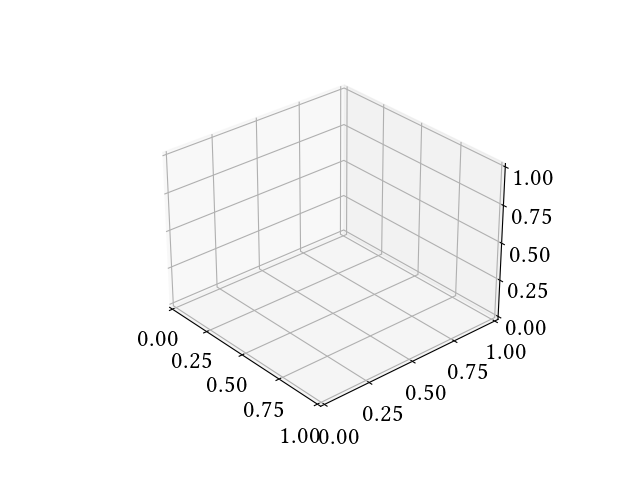

In [134]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Here's a full example:

<IPython.core.display.Javascript object>


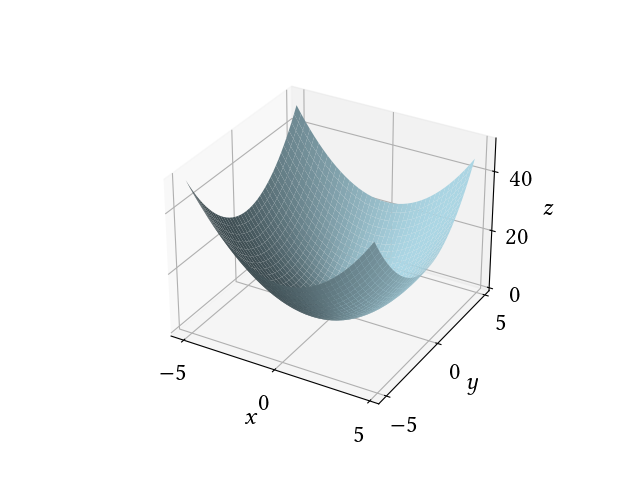

Text(0.5, 0, '$z$')

In [146]:
xx = np.arange(-5, 5, 0.25)
yy = np.arange(-5, 5, 0.25)
xx, yy = np.meshgrid(xx, yy)
zz = xx**2 + yy**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xx, yy, zz, color = "lightblue")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')